<a href="https://colab.research.google.com/github/drvoss/Colab-Notebooks/blob/master/BostonHousing_NN_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

(404, 13)
(404,)
(102, 13)
(102,)
[15.2 42.3 50.  21.1 17.7 18.5 11.3 15.6 15.6 14.4]
Train on 323 samples, validate on 81 samples
Epoch 1/500
323/323 [==============================] - 0s 451us/sample - loss: 559.2491 - mean_absolute_error: 21.7854 - val_loss: 582.9302 - val_mean_absolute_error: 22.3595
Epoch 2/500
323/323 [==============================] - 0s 207us/sample - loss: 514.6711 - mean_absolute_error: 20.6859 - val_loss: 532.2716 - val_mean_absolute_error: 21.1935
Epoch 3/500
323/323 [==============================] - 0s 118us/sample - loss: 464.6479 - mean_absolute_error: 19.3797 - val_loss: 468.0602 - val_mean_absolute_error: 19.6365
Epoch 4/500
323/323 [==============================] - 0s 149us/sample - loss: 399.7107 - mean_absolute_error: 17.6815 - val_loss: 387.6297 - val_mean_absolute_error: 17.5592
Epoch 5/500
323/323 [==============================] - 0s 127us/sample - loss: 320.4729 - mean_absolute_error: 15.6000 - val_loss: 291.9110 - val_mean_absolute_error: 14

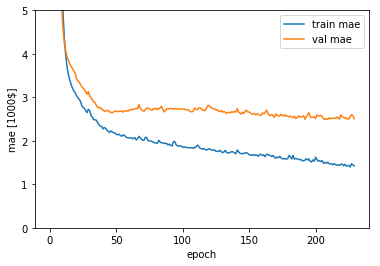

102/102 [==============================] - 0s 117us/sample - loss: 15.6520 - mean_absolute_error: 2.6175
loss: 15.652
mae: 2.618
[ 7. 19. 19. 27. 22. 24. 31. 23. 20. 23.]
[ 9. 21. 23. 29. 27. 22. 25. 23. 19. 20.]


In [3]:
from tensorflow.keras.datasets import boston_housing
from tensorflow.keras.layers import Activation, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

(train_data, train_labels), (test_data, test_labels) = boston_housing.load_data()
print(train_data.shape)
print(train_labels.shape)
print(test_data.shape)
print(test_labels.shape)

# pandas를 이용 테이블로 데이터 확인
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM'
, 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
'''
df = pd.DataFrame(train_data, columns=column_names)
df.head()
'''

# 훈련라벨 확인
print(train_labels[0:10])

# 비슷한 데이터를 연속해서 학습하면 바이어스가 생겨 데이터를 섞어준다
order = np.argsort(np.random.random(train_labels.shape))
train_data = train_data[order]
train_labels = train_labels[order]

# 차원이 다른 데이터 정규화
# Y = (X(데이터)-u(X의 평균)) / b(X의 표준 편차)
mean = train_data.mean(axis=0)
std = train_data.std(axis=0)
train_data = (train_data - mean) / std
mean = test_data.mean(axis=0)
std = test_data.std(axis=0) 
test_data = (test_data - mean) / std

# 모델 생성
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(13, )))
model.add(Dense(64, activation='relu'))
model.add(Dense(1))

# 컴파일
# 손실함수가 회귀이므로 MSE를 사용
model.compile(loss='mse', optimizer=Adam(lr=0.001), metrics=['mae'])

# 얼리 스토핑 설정
early_stop = EarlyStopping(monitor='val_loss', patience=20)

# 학습
history = model.fit(train_data, train_labels
                    , epochs=500
                    , validation_split=0.2, callbacks=[early_stop])

plt.plot(history.history['mean_absolute_error'], label='train mae')
plt.plot(history.history['val_mean_absolute_error'], label='val mae')
plt.xlabel('epoch')
plt.ylabel('mae [1000$]')
plt.legend(loc='best')
plt.ylim([0,5])
plt.show()

test_loss, test_mae = model.evaluate(test_data, test_labels)
print('loss: {:.3f}\nmae: {:.3f}'.format(test_loss, test_mae))

print(np.round(test_labels[0:10]))
test_predictions = model.predict(test_data[0:10]).flatten()
print(np.round(test_predictions))